In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

# Initialize RNN

In [2]:
# Parameters
N_inp = 5000
N_bar = 5000
num_states = 100

In [3]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
model = Model(
    N_inp, N_bar, num_states,
    plasticity_bias = -0.45,
    narrow_search_factor=0.5, wide_search_factor=1.5,
    )

In [4]:
cache_states = [20, 35, 70]

# Add predictive skew to RNN weights

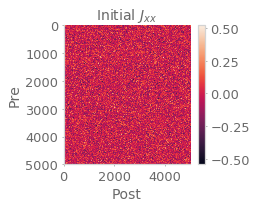

In [10]:
plt.figure(figsize=(3.5,3))
original_J_xx = model.J_xx.copy()
plt.imshow(original_J_xx, aspect='auto')
plt.colorbar()
plt.title(r'Initial $J_{xx}$')
plt.xlabel('Post')
plt.ylabel('Pre')
plt.tight_layout()
plt.savefig('pred_initial_jxx.png', dpi=300)
plt.show()

In [5]:
identity = np.eye(model.N_bar)
total_delta = np.zeros((model.N_bar, model.N_bar))
n_shifts = 500 
gamma = 0.99
for s in range(1, n_shifts):
    shifted = np.roll(identity, shift=-(s+50), axis=0)
    delta = (gamma**s)*0.04*shifted
    model.J_xx += delta
    total_delta += delta.copy()

In [6]:
new = model.J_xx.copy()

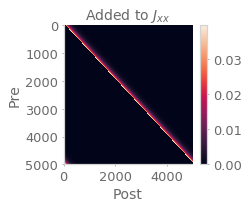

In [12]:
plt.figure(figsize=(3.5,3))
plt.imshow(total_delta, aspect='auto')
plt.colorbar()
plt.title(r'Added to $J_{xx}$')
plt.xlabel('Post')
plt.ylabel('Pre')
plt.tight_layout()
plt.savefig('pred_added_jxx.png', dpi=300)
plt.show()

# RNN activity under different recurrent strengths
(Black line indicates the identity line)

#### $r=0$

In [13]:
_, acts, _, _ = model.run_recurrent_r(place_inputs, 0.)

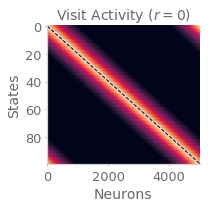

In [14]:
plt.figure(figsize=(3,3))
plt.imshow(acts, aspect='auto')
plt.plot([0,N_bar-1], [0,num_states-1], color='black', linestyle='--')
plt.xlabel('Neurons')
plt.ylabel('States')
plt.title(f"Visit Activity ($r=0$)")
plt.tight_layout()
plt.savefig('pred_visit.png', dpi=300)
plt.show()

#### $r=0.3$

In [16]:
_, acts, _, _ = model.run_recurrent_r(place_inputs, 0.3)

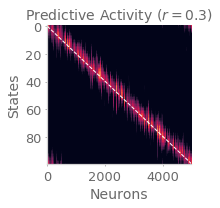

In [17]:
plt.figure(figsize=(3,3))
plt.imshow(acts, aspect='auto')
plt.plot([0,N_bar-1], [0,num_states-1], color='white', linestyle='--')
plt.xlabel('Neurons')
plt.ylabel('States')
plt.title(f"Predictive Activity ($r=0.3$)")
plt.tight_layout()
plt.savefig('pred_r0.3.png', dpi=300)
plt.show()

#### $r=0.6$

In [18]:
_, acts, _, _ = model.run_recurrent_r(place_inputs, 0.6)

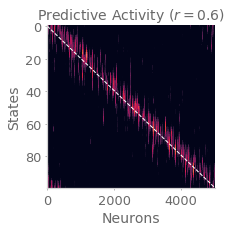

In [19]:
plt.figure(figsize=(3,3))
plt.imshow(acts, aspect='auto')
plt.plot([0,N_bar-1], [0,num_states-1], color='white', linestyle='--')
plt.xlabel('Neurons')
plt.ylabel('States')
plt.title(f"Predictive Activity ($r=0.6$)")
plt.show()

#### $r=1.0$

In [20]:
_, acts, _, _ = model.run_recurrent_r(place_inputs, 1.0)

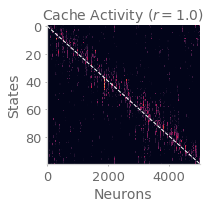

In [21]:
plt.figure(figsize=(3,3))
plt.imshow(acts, aspect='auto')
plt.plot([0,N_bar-1], [0,num_states-1], color='white', linestyle='--')
plt.xlabel('Neurons')
plt.ylabel('States')
plt.title(f"Cache Activity ($r=1.0$)")
plt.tight_layout()
plt.savefig('pred_r1.0.png', dpi=300)
plt.show()

# Running learning +  narrow/broad Recall

In [22]:
identification_s = 0.0

Now I just cached at location: 20


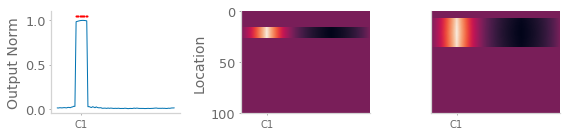

Now I just cached at location: 35


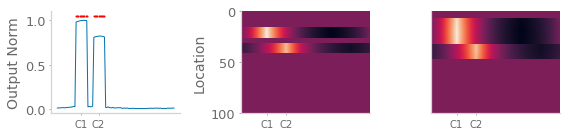

Now I just cached at location: 70


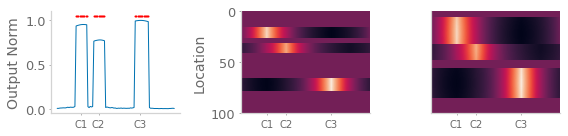

In [23]:
cache_identification = []
narrow_recall = []
wide_recall = []

for c_idx, cache_state in enumerate(cache_states):
    
    print("Now I just cached at location:", cache_state)
    preacts, acts, _, acts_over_time = model.run_recurrent(place_inputs, n_zero_input=20)
    model.update(place_inputs[cache_state], acts[cache_state], preacts[cache_state])

    _, _, _cache_identification, _ = model.run_recall(identification_s, place_inputs)
    cache_identification.append(_cache_identification.copy())
    
    _, _, _narrow_recall, _ = model.run_recall(identification_s, place_inputs)
    narrow_recall.append(_narrow_recall.copy())
    
    _, _, _wide_recall, _ = model.run_wide_recall(place_inputs)
    wide_recall.append(_wide_recall.copy())

    recall_plots(_cache_identification, _narrow_recall, _wide_recall, cache_states[:c_idx+1])

# RNN activity under different recurrent strengths

#### $r=0$

In [24]:
_, acts, _, _ = model.run_recurrent_r(place_inputs, 0.)

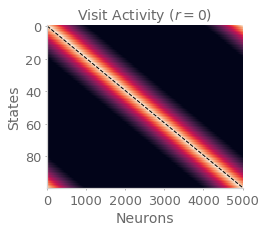

In [25]:
plt.figure(figsize=(3.5,3))
plt.imshow(acts, aspect='auto')
plt.plot([0,N_bar-1], [0,num_states-1], color='black', linestyle='--')
plt.xlabel('Neurons')
plt.ylabel('States')
plt.title(f"Visit Activity ($r=0$)")
plt.show()

#### $r=0.3$

In [26]:
_, acts, _, _ = model.run_recurrent_r(place_inputs, 0.3)

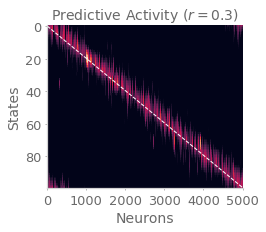

In [27]:
plt.figure(figsize=(3.5,3))
plt.imshow(acts, aspect='auto')
plt.plot([0,N_bar-1], [0,num_states-1], color='white', linestyle='--')
plt.xlabel('Neurons')
plt.ylabel('States')
plt.title(f"Predictive Activity ($r=0.3$)")
plt.show()

#### $r=0.6$

In [28]:
_, acts, _, _ = model.run_recurrent_r(place_inputs, 0.6)

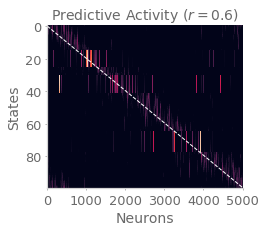

In [29]:
plt.figure(figsize=(3.5,3))
plt.imshow(acts, aspect='auto')
plt.plot([0,N_bar-1], [0,num_states-1], color='white', linestyle='--')
plt.xlabel('Neurons')
plt.ylabel('States')
plt.title(f"Predictive Activity ($r=0.6$)")
plt.show()

#### $r=1.0$

In [30]:
_, acts, _, _ = model.run_recurrent_r(place_inputs, 1.0)

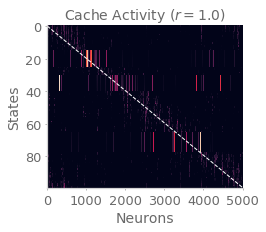

In [31]:
plt.figure(figsize=(3.5,3))
plt.imshow(acts, aspect='auto')
plt.plot([0,N_bar-1], [0,num_states-1], color='white', linestyle='--')
plt.xlabel('Neurons')
plt.ylabel('States')
plt.title(f"Cache Activity ($r=1.0$)")
plt.show()